# Logistic Regression Practice
**Possums**

<img src="./images/pos2.jpg" style="height: 250px">

*The common brushtail possum (Trichosurus vulpecula, from the Greek for "furry tailed" and the Latin for "little fox", previously in the genus Phalangista) is a nocturnal, semi-arboreal marsupial of the family Phalangeridae, native to Australia, and the second-largest of the possums.* -[Wikipedia](https://en.wikipedia.org/wiki/Common_brushtail_possum)

In [32]:
# Imports
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

### We are trying to predict where a possum lives. In our dataset, the 'pop' column either lists 'Vic' or 'other', with 'Vic' short for Victoria. Our goal is to make a classification model that will predict whether a possum lives in Victoria or somewhere else.

### Get the data

Read in the `possum.csv` data (located in the `data` folder).

In [2]:
df = pd.read_csv(r'data/possum.csv')
df.head()

,site,pop,sex,age,head_l,skull_w,total_l,tail_l
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0


In [3]:
# How much data do I have?
df.shape

(104, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   site     104 non-null    int64  
 1   pop      104 non-null    object 
 2   sex      104 non-null    object 
 3   age      102 non-null    float64
 4   head_l   104 non-null    float64
 5   skull_w  104 non-null    float64
 6   total_l  104 non-null    float64
 7   tail_l   104 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 6.6+ KB


In [5]:
# Baseline Score
# For regression - This is our model's performance if I guessed the mean each time. 
# R2 (close to one as possible), mean_squared_error (low as possible), mean_absolute_error

# See DummyRegressor()
# dr = DummyRegressor(strategy = 'mean')
# dr.fit(X_train, y_train)
# dr.score(X_train, y_train) <-- Our baseline R2 score

# For Classification
# The percentage in the majority class. (i.e. Predicting 'other' every single time)

df['pop'].value_counts(normalize=True)

# My baseline accuracy is 55.8%. If I had a model predict 'other' each time, 
# it would be right 55.8% of the time. THIS is our goal to beat! Our Model needs to beat 55.8% of the majority class.

other    0.557692
Vic      0.442308
Name: pop, dtype: float64

### Preprocessing

> Check for & deal with any missing values.  
Convert categorical columns to numeric.  
Do any other preprocessing you feel is necessary.

In [6]:
df.isnull().sum()


site       0
pop        0
sex        0
age        2
head_l     0
skull_w    0
total_l    0
tail_l     0
dtype: int64

In [7]:
# Deal with the missing values
# We could simply drop the two rows that had a missing age
# Or let's just fill it with the mean

# The reason we need to do this because we can not fil a model
# that has ANY missing values

mean_value = df['age'].mean()


In [8]:
df['age'].fillna(mean_value, inplace = True)
df.isnull().sum()

site       0
pop        0
sex        0
age        0
head_l     0
skull_w    0
total_l    0
tail_l     0
dtype: int64

In [9]:
df.dtypes


site         int64
pop         object
sex         object
age        float64
head_l     float64
skull_w    float64
total_l    float64
tail_l     float64
dtype: object

In [10]:
df['sex'].map({'m':1, 'f':0})

0      1
1      0
2      0
3      0
4      0
      ..
99     1
100    1
101    0
102    1
103    0
Name: sex, Length: 104, dtype: int64

In [11]:
# Convert 'sex' m/f to 1/0
df['sex_m'] = df['sex'].map({'m':1, 'f':0})
df.drop(columns = 'sex', inplace = True)
df.head()



,site,pop,age,head_l,skull_w,total_l,tail_l,sex_m
0,1,Vic,8.0,94.1,60.4,89.0,36.0,1
1,1,Vic,6.0,92.5,57.6,91.5,36.5,0
2,1,Vic,6.0,94.0,60.0,95.5,39.0,0
3,1,Vic,6.0,93.2,57.1,92.0,38.0,0
4,1,Vic,2.0,91.5,56.3,85.5,36.0,0


In [12]:
import seaborn as sns



In [14]:
# Moved the pop category to be numerical for the corr/heatmap below
df['pop'] = df['pop'].map({'Vic': 1, 'other' : 0})

In [16]:
df.corr()

,site,pop,age,head_l,skull_w,total_l,tail_l,sex_m
site,1.000000,-0.892326,-0.130799,-0.163646,-0.083548,-0.260843,0.380444,0.232817
pop,-0.892326,1.000000,0.085747,-0.001267,-0.065908,0.078666,-0.490856,-0.195811
age,-0.130799,0.085747,1.000000,0.311848,0.279955,0.250970,0.117274,-0.063995
head_l,-0.163646,-0.001267,0.311848,1.000000,0.710827,0.691094,0.287429,0.107200
skull_w,-0.083548,-0.065908,0.279955,0.710827,1.000000,0.526413,0.255921,0.080014
total_l,-0.260843,0.078666,0.250970,0.691094,0.526413,1.000000,0.565646,-0.160200
tail_l,0.380444,-0.490856,0.117274,0.287429,0.255921,0.565646,1.000000,-0.040917
sex_m,0.232817,-0.195811,-0.063995,0.107200,0.080014,-0.160200,-0.040917,1.000000


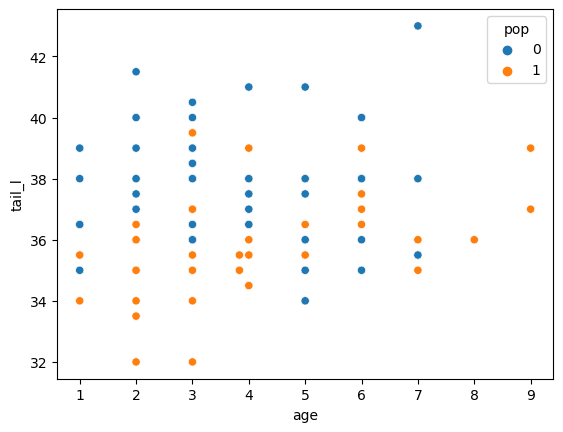

In [21]:
sns.scatterplot(x = df['age'], y = df['tail_l'], hue = df['pop']);

<Axes: >

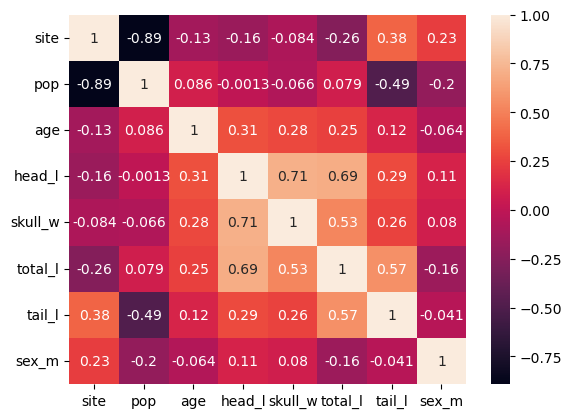

In [25]:
sns.heatmap(df.corr(), annot = True)

### Modeling

> Build Logistic Regression model to predict `pop`; region of origin.  
Examine the performance of the model.

In [31]:
# Set up X and y

X = df.drop(columns = 'pop')
y = df['pop']

In [33]:
# Train test split!
# Note: We do this to preserve data to evaluate our model on unseen data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [36]:
# Instantiate your model!

logreg = LogisticRegression(random_state=42, solver = 'liblinear') #solver got rid of the warning that happened on the cell below

In [37]:
# Fit the Model on training set!

logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [40]:
# How did it do?
# Regression ---> lr.score(X_train, y_train) --> the score for regression is our r2 score
# Classification ---> logreg.score(X_train, y_train) --> the score for classification is accuracy
logreg.score(X_train, y_train)


1.0

In [39]:
# This is what I care about, 
# How well did it perform on unseen data?
logreg.score(X_test, y_test)

0.9615384615384616

### Interpretation & Predictions

> Interpret at least one coefficient from your model.  
> Generate predicted probabilities for your testing set.  
> Generate predictions for your testing set.

In [41]:
X_test

,site,age,head_l,skull_w,total_l,tail_l,sex_m
30,1,3.000000,92.8,54.1,93.0,37.0,1
65,5,3.000000,90.4,55.8,86.0,36.5,0
64,5,5.000000,93.5,57.4,88.5,38.0,0
53,4,7.000000,96.9,63.0,91.5,43.0,1
45,2,3.833333,91.4,54.4,84.0,35.0,1
93,7,7.000000,91.8,57.6,84.0,35.5,1
91,7,2.000000,90.7,56.3,85.0,37.0,1
47,3,5.000000,98.6,63.2,85.0,34.0,1
10,1,9.000000,93.3,57.2,89.5,39.0,0
0,1,8.000000,94.1,60.4,89.0,36.0,1


In [42]:
logreg.predict(X_test)

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0], dtype=int64)

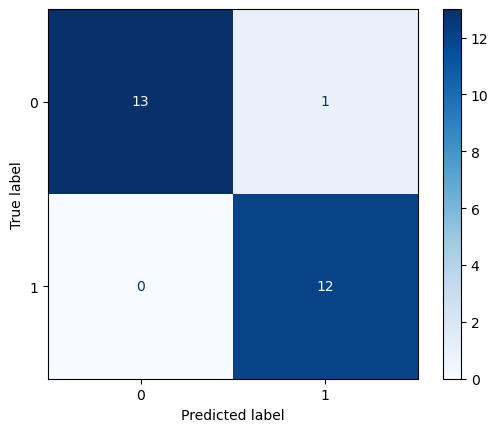

In [43]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, cmap = 'Blues');

# In the top right, we predicted a possum in Vic vs Other and it was wrong (One False/Positive)

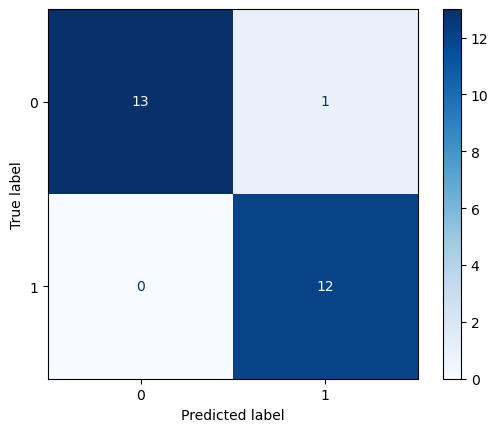

In [47]:
ConfusionMatrixDisplay.from_predictions(y_pred = logreg.predict(X_test), y_true = y_test, cmap = 'Blues');

In [49]:
logreg.predict(X_test)

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0], dtype=int64)

In [48]:
logreg.predict_proba(X_test).round(3)

# first row - 97% confident that the possum was in Victoria
# second row - 99.8% confident that the possum was in Other

#First Column = 'Other
#Second Column = 'Vic'

array([[0.028, 0.972],
       [0.998, 0.002],
       [0.998, 0.002],
       [0.983, 0.017],
       [0.139, 0.861],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.341, 0.659],
       [0.026, 0.974],
       [0.018, 0.982],
       [0.011, 0.989],
       [0.029, 0.971],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.016, 0.984],
       [1.   , 0.   ],
       [0.222, 0.778],
       [0.014, 0.986],
       [0.016, 0.984],
       [1.   , 0.   ],
       [0.939, 0.061],
       [0.018, 0.982],
       [1.   , 0.   ],
       [0.118, 0.882],
       [1.   , 0.   ]])

In [51]:
# Check out some coefficients!
pd.Series(logreg.coef_[0], index = X.columns)

site      -2.482776
age       -0.015436
head_l     0.242525
skull_w   -0.051182
total_l   -0.094468
tail_l    -0.131861
sex_m     -0.106764
dtype: float64

In [52]:
import numpy as np

# Interpreting the tail length coefficient:
np.exp(-0.131861)

0.8764628149439738

In [ ]:
# If the number above is less than 1, then that means it is 1 - np.exp(coef) less likely to be in our target.
# If the number above is more than 1, then that means it is np.exp(coef) times as likely to be in our target.

### What this is saying, is that ALL ELSE HELD CONSTANT, a 1 unit increase in a possum's tail length suggests that it is 12.2% less likely to live in Vic region

In [ ]:
# Black Box Models
# - Random Forest - Group of 100 decision trees
# - XGBoost

# White Box Models
# - Decision Tree - One tree
# - Logistic - Linear Regression
# - Classification -Regression